In [1]:
import pandas as pd
df = pd.read_csv('/content/file1.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          51 non-null     int64  
 1   area_name           51 non-null     object 
 2   city_name           51 non-null     object 
 3   state_name          51 non-null     object 
 4   country_name        51 non-null     object 
 5   _geoloc             51 non-null     object 
 6   popularity          51 non-null     float64
 7   elevation_gain      51 non-null     float64
 8   difficulty_rating   51 non-null     int64  
 9   visitor_usage       50 non-null     float64
 10  avg_rating          51 non-null     float64
 11  num_reviews         51 non-null     int64  
 12  features            51 non-null     object 
 13  activities          51 non-null     object 
 14  units               51 non-null     object 
 15  lat                 51 non-null     float64
 16  lng       

In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,area_name,city_name,state_name,country_name,_geoloc,popularity,elevation_gain,difficulty_rating,visitor_usage,avg_rating,...,1988,1987,1986,1985,1984,1983,1982,1981,1980,visitor_pct_change
0,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,1161.8976,5,3.0,5.0,...,59017,60428,54296,35758,30703.0,24048.0,16118.0,NaN,NaN,-5.303534
1,Grand Canyon National Park,Grand Canyon,Arizona,United States,"{'lat': 36.05735, 'lng': -112.14381}",37.4791,1525.8288,5,3.0,5.0,...,3859886,3513030,3035787,2711529,2173584.0,2248082.0,2293127.0,2472270.0,2304973.0,4.399696
2,Saguaro National Park,Tucson,Arizona,United States,"{'lat': 32.23512, 'lng': -110.68683}",20.8545,326.7456,3,2.0,4.5,...,675397,689933,613651,636711,699292.0,634688.0,566807.0,470598.0,611317.0,-15.891297
3,Petrified Forest National Park,Holbrook,Arizona,United States,"{'lat': 34.93947, 'lng': -109.75639}",15.5733,32.9184,1,3.0,4.5,...,857031,758082,761257,736659,714761.0,708512.0,710619.0,747832.0,683121.0,-14.419803
4,Hot Springs National Park,Hot Springs National Park,Arkansas,United States,"{'lat': 34.5256, 'lng': -93.03637}",12.9365,722.9856,5,2.0,4.0,...,1185772,1101242,1175170,1112764,1071853.0,1160008.0,1015580.0,1177911.0,1160588.0,22.342807
5,Yosemite National Park,Yosemite Valley,California,United States,"{'lat': 37.73495, 'lng': -119.56619}",68.1488,667.8168,3,3.0,5.0,...,3216681,3152275,2876717,2831952,2738467.0,2457464.0,2415587.0,2516893.0,2490282.0,11.557233
6,Sequoia National Park,Three Rivers,California,United States,"{'lat': 36.54685, 'lng': -118.76565}",44.1235,56.9976,3,3.0,4.5,...,1031129,1139389,1056527,939468,979632.0,854233.0,1020500.0,1083002.0,862397.0,8.838675
7,Joshua Tree National Park,Twentynine Palms,California,United States,"{'lat': 34.00264, 'lng': -116.13594}",37.0218,325.8312,3,3.0,4.5,...,955246,830085,783224,641172,663798.0,671426.0,673201.0,612966.0,545357.0,-0.199256
8,Lassen Volcanic National Park,Old Station,California,United States,"{'lat': 40.47458, 'lng': -121.5057}",32.6439,599.8464,5,3.0,5.0,...,495628,472431,439723,451497,463275.0,429867.0,414859.0,415045.0,394425.0,24.095541
9,Kings Canyon National Park,Hume,California,United States,"{'lat': 36.79495, 'lng': -118.58315}",31.6191,270.9672,3,3.0,5.0,...,1007695,1081172,1028785,874456,937262.0,765755.0,831044.0,77685.0,819065.0,13.868450


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


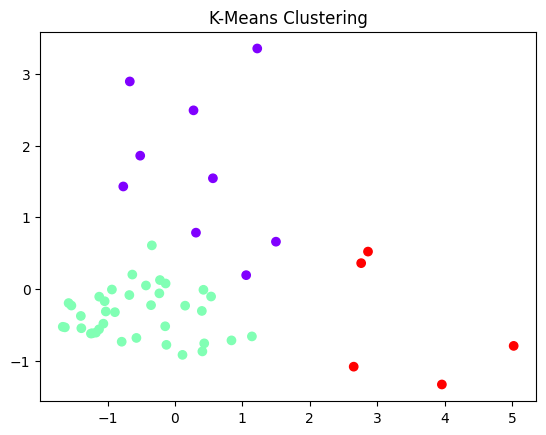

In [3]:
# Load park data
import pandas as pd
parks = pd.read_csv('/content/file1.csv')

# Features to use for clustering
features = ['popularity', 'elevation_gain', 'num_reviews']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
parks[features] = scaler.fit_transform(parks[features])

# K-means with k=3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(parks[features])
parks['kmeans_cluster'] = kmeans.predict(parks[features])

# Visualize clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(2)
park_pca = pca.fit_transform(parks[features])

fig, ax = plt.subplots()
ax.scatter(park_pca[:,0], park_pca[:,1], c=kmeans.labels_, cmap='rainbow')
ax.set_title("K-Means Clustering")
plt.savefig('kmeans.png')

In [4]:
import pandas as pd
import numpy as np

# Create random park data
np.random.seed(42)
num_parks = 50

parks = pd.DataFrame()

parks['area_name'] = ['Park ' + str(i) for i in range(num_parks)]

# Continuous features
parks['popularity'] = np.random.randint(1, 100, size=num_parks)
parks['elevation_gain'] = np.random.randint(100, 2000, size=num_parks)
parks['num_reviews'] = np.random.randint(10, 5000, size=num_parks)

# Categorical features
activity_options = ['hiking', 'camping', 'birding', 'boating', 'skiing']
parks['activities'] = [np.random.choice(activity_options, size=np.random.randint(1, 5),
                                        replace=False).tolist() for _ in range(num_parks)]

# Save to file
parks.to_csv('parks_data.csv', index=False)
print(parks.head())

  area_name  popularity  elevation_gain  num_reviews  \
0    Park 0          52             487          347   
1    Park 1          93             700          888   
2    Park 2          15             415         1086   
3    Park 3          72             113         4897   
4    Park 4          61             341         4003   

                           activities  
0           [birding, hiking, skiing]  
1                  [boating, birding]  
2  [hiking, birding, camping, skiing]  
3           [skiing, boating, hiking]  
4                  [camping, birding]  


In [5]:
import pandas as pd
import numpy as np

# Seed random number generator
np.random.seed(101)

num_parks = 50

# Initialize dataframe
parks_df = pd.DataFrame()

# Park names
parks_df["park_name"] = ["Park" + str(i) for i in range(1, num_parks+1)]

# Continuous features
parks_df["elevation_gain"] = np.random.randint(100, 1500, size=num_parks)
parks_df["num_activities"] = np.random.randint(3, 10, size=num_parks)
parks_df["num_reviews"] = np.random.randint(100, 5000, size=num_parks)
parks_df["popularity"] = np.random.randint(1, 100, size=num_parks)

# Location feature
parks_df["state"] = np.random.choice(["CA", "TX", "UT", "WA", "WY", "CO"], size=num_parks)

# Export dataframe to CSV
parks_df.to_csv("national_parks.csv", index=False)
print(parks_df.head())

  park_name  elevation_gain  num_activities  num_reviews  popularity state
0     Park1             963               7         4136          69    WY
1     Park2            1461               6         1368          69    CA
2     Park3             699               5         1799          62    CA
3     Park4             175               6         3379          19    CO
4     Park5            1073               9         2374          52    WY


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load national parks dataset
parks_df = pd.read_csv("parks_data.csv")

# Features
features = ['elevation_gain', 'num_reviews', 'popularity']

# Standardize features
scaler = StandardScaler()
scaled_feats = scaler.fit_transform(parks_df[features])

# K-Means cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_feats)
parks_df['cluster'] = kmeans.labels_

print(parks_df['cluster'].value_counts())

1    23
0    15
2    12
Name: cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'PCA plot of KMeans Clusters')

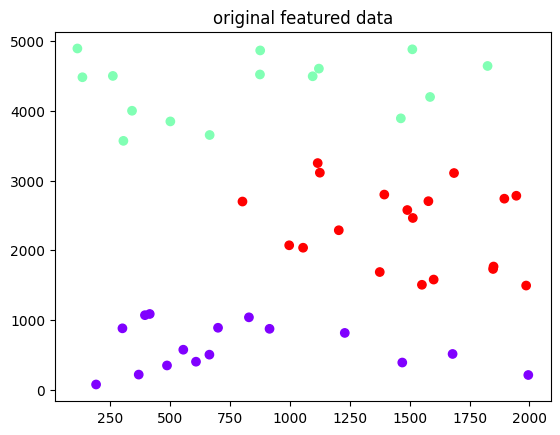

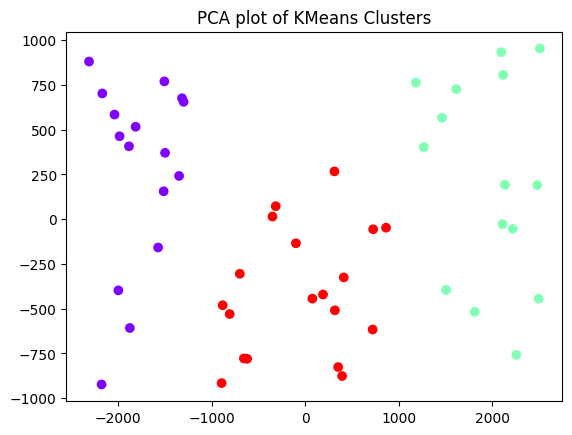

In [7]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Train k-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(parks_df[features])

# Assign cluster labels
parks_df['cluster'] = kmeans.labels_

# Plot original features data
plt.scatter(parks_df['elevation_gain'], parks_df['num_reviews'], c=parks_df['cluster'], cmap='rainbow')
plt.title("original featured data")
# Plot clusters on 2D principal components
from sklearn.decomposition import PCA
pca_2d = PCA(2)
pca_2d_data = pca_2d.fit_transform(parks_df[features])

plt.figure()
plt.scatter(pca_2d_data[:,0], pca_2d_data[:,1], c=parks_df['cluster'], cmap='rainbow')
plt.title("PCA plot of KMeans Clusters")

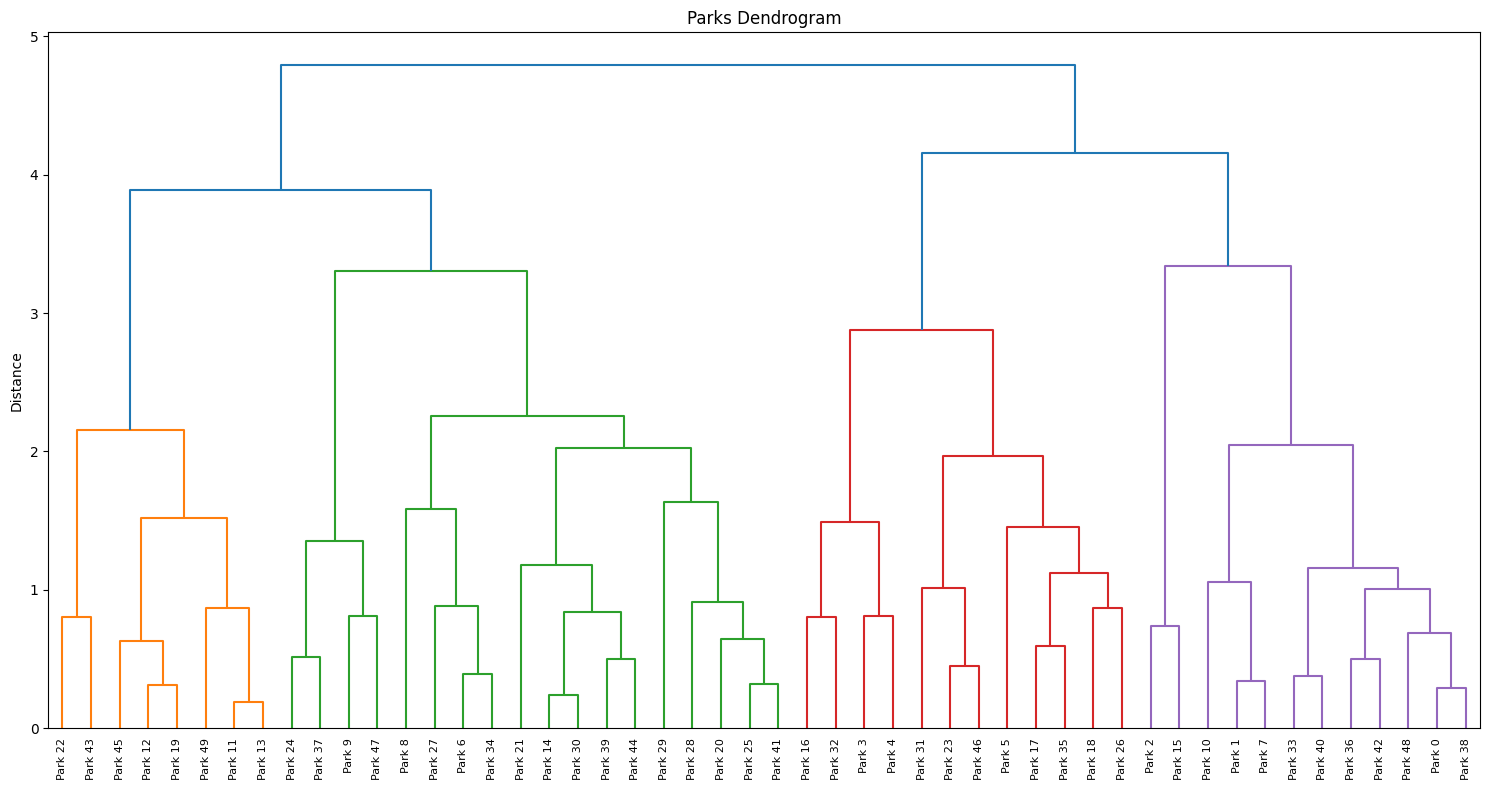

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Features
features = ['elevation_gain', 'num_reviews', 'popularity']

# Standardize features
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(parks_df[features])

# Distance matrix
from scipy.spatial.distance import pdist
dist_matrix = pdist(scaled_feat)

# Create linkage matrix
cluster_linkage = linkage(dist_matrix, 'complete')

labels = parks_df['area_name'].tolist()

# Plot dendrogram
fig, ax = plt.subplots(figsize=(15, 8))
dendrogram_obj = dendrogram(cluster_linkage, labels=labels, ax=ax)

ax.set_title("Parks Dendrogram")
ax.set_ylabel('Distance')
plt.tight_layout()
plt.savefig('parks_dendrogram.png')

In [9]:
import pandas as pd

input_file_path = '/content/file1.csv'
output_file_path = 'output.csv'

selected_columns = ['elevation_gain', '2022', 'avg_rating', 'difficulty_rating']

original_data = pd.read_csv(input_file_path)

selected_data = original_data[selected_columns]

selected_data.to_csv(output_file_path, index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 2 The average silhouette_score is : 0.848223231655088
For k = 3 The average silhouette_score is : 0.7154798239475918
For k = 4 The average silhouette_score is : 0.6766139024160427
For k = 5 The average silhouette_score is : 0.6445136617255823


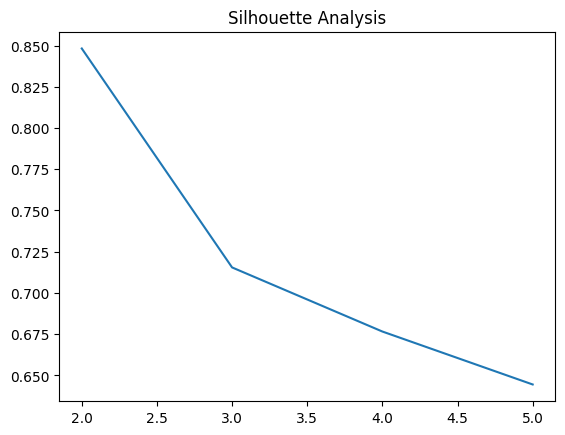

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


X_df = pd.read_csv('/content/output.csv')

# Iterate through different k
silhouette_scores = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_df, cluster_labels)
    print("For k =", k,"The average silhouette_score is :", silhouette_avg)
    silhouette_scores[k] = silhouette_avg

# Plot silhouette scores
import matplotlib.pyplot as plt
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.title("Silhouette Analysis")
plt.savefig("silhouette.png")

In [11]:
import pandas as pd

input_file_path = '/content/parks_data.csv'
output_file_path = 'arm.csv'

selected_columns = ['area_name', 'activities']

original_data = pd.read_csv(input_file_path)

selected_data = original_data[selected_columns]

selected_data.to_csv(output_file_path, index=False)

In [12]:
import pandas as pd

# Load dataset
trails = pd.read_csv('/content/file1.csv')

# Print column names
print(trails.columns)

# Check if columns present
if 'area_name' in trails and 'activities' in trails:

    # Extract columns into variables
    area_names = trails['area_name']
    activities = trails['activities']

    # Print first 5 rows
    print(area_names.head())
    print(activities.head())

else:
    print("Columns not present")

df = pd.DataFrame()

# Insert columns
df['area_name'] = area_names
df['activities'] = activities

# Inspect 5 records
print(df.head())

Index(['Unnamed: 0', 'area_name', 'city_name', 'state_name', 'country_name',
       '_geoloc', 'popularity', 'elevation_gain', 'difficulty_rating',
       'visitor_usage', 'avg_rating', 'num_reviews', 'features', 'activities',
       'units', 'lat', 'lng', 'summer_temp', 'winter_temp', 'annual_rain',
       'annual_snow', 'Region', 'Park Type', '2022', '2021', '2020', '2019',
       '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
       '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001',
       '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992',
       '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983',
       '1982', '1981', '1980', 'visitor_pct_change'],
      dtype='object')
0        Kenai Fjords National Park
1        Grand Canyon National Park
2             Saguaro National Park
3    Petrified Forest National Park
4         Hot Springs National Park
Name: area_name, dtype: object
0    ['birding', '

In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


df.info()

# Display the original dataset
print("Original Dataset:")
print(df)
print("\n")

# Convert lists in 'activities' to strings
df['activities'] = df['activities'].apply(lambda x: ', '.join(x))

# Transform data for ARM
transactions = df.groupby('area_name')['activities'].apply(list).values.tolist()

# Transform data to binary format
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
binary_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(binary_df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\n")

print("Association Rules:")
print(rules)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   area_name   51 non-null     object
 1   activities  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes
Original Dataset:
                                     area_name  \
0                   Kenai Fjords National Park   
1                   Grand Canyon National Park   
2                        Saguaro National Park   
3               Petrified Forest National Park   
4                    Hot Springs National Park   
5                       Yosemite National Park   
6                        Sequoia National Park   
7                    Joshua Tree National Park   
8                Lassen Volcanic National Park   
9                   Kings Canyon National Park   
10                     Pinnacles National Park   
11                  Death Valley National Park   
12                       

In [14]:
trails = pd.read_csv('/content/file1.csv')

# Encode activities into dummy columns
activities_dummies = pd.get_dummies(trails['activities'])

# Join back to dataset
tra = df.join(activities_dummies)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
from mlxtend.frequent_patterns import apriori

activities = df['activities']
act_dummies = pd.get_dummies(activities.apply(pd.Series).stack()).sum(level=0)

# Join back dummy columns
df = df.join(act_dummies)

# Define activity columns
activity_cols = [c for c in df.columns if c.startswith('activities')]

# Now run apriori
freq_sets = apriori(df[activities],
              use_colnames=True,
              min_support=0.05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-1ce9c3175b30>:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  act_dummies = pd.get_dummies(activities.apply(pd.Series).stack()).sum(level=0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [17]:
import pandas as pd
df = pd.read_csv('file1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          51 non-null     int64  
 1   area_name           51 non-null     object 
 2   city_name           51 non-null     object 
 3   state_name          51 non-null     object 
 4   country_name        51 non-null     object 
 5   _geoloc             51 non-null     object 
 6   popularity          51 non-null     float64
 7   elevation_gain      51 non-null     float64
 8   difficulty_rating   51 non-null     int64  
 9   visitor_usage       50 non-null     float64
 10  avg_rating          51 non-null     float64
 11  num_reviews         51 non-null     int64  
 12  features            51 non-null     object 
 13  activities          51 non-null     object 
 14  units               51 non-null     object 
 15  lat                 51 non-null     float64
 16  lng       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
